In [1]:
# Decision Tree Ödevi — Veri Analizi Notebook
# Bu notebook .ipynb olarak çalıştırılmak üzere hazırlandı.
# İçinde hem kodlar hem de veriye dair analiz (yorum) hücreleri bulunuyor.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


In [7]:
# Veri Seti Açıklaması:
# - Case Type: Davanın türü (Criminal, Civil, Commercial)
# - Case Duration (Days): Davanın süresi
# - Judge Experience (Years): Hakimin deneyim yılı
# - Number of Witnesses: Tanık sayısı
# - Legal Fees (USD): Hukuk masrafları
# - Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)
# - Defendant's Wealth (USD): Davalının serveti
# - Number of Evidence Items: Delil sayısı
# - Number of Legal Precedents: İlgili hukuki emsal sayısı
# - Settlement Offered (USD): Teklif edilen uzlaşma miktarı
# - Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)
# - Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)

#### Veri Ön İşleme

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB


In [16]:
data.describe()

,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.0
mean,202.465000,20.13000,10.375000,26480.925000,1.905000,526074.070000,45.3550,4.880000,24306.540000,1.860000,0.0
std,93.649989,11.32095,5.576726,13327.710123,0.836345,266597.695079,27.9029,3.061448,14638.702156,0.789631,0.0
min,30.000000,1.00000,1.000000,5032.000000,1.000000,15798.000000,1.0000,0.000000,59.000000,1.000000,0.0
25%,130.250000,10.75000,6.000000,15183.500000,1.000000,307007.000000,20.0000,2.000000,12218.000000,1.000000,0.0
50%,206.000000,20.00000,11.000000,27004.500000,2.000000,532654.000000,45.5000,5.000000,24249.000000,2.000000,0.0
75%,285.750000,30.25000,15.250000,38643.250000,3.000000,732185.750000,70.0000,8.000000,36420.500000,2.250000,0.0
max,362.000000,39.00000,19.000000,49831.000000,3.000000,998828.000000,97.0000,9.000000,49976.000000,3.000000,0.0


In [18]:
print("Eksik değer sayısı:\n", data.isnull().sum())

Eksik değer sayısı:
 Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64


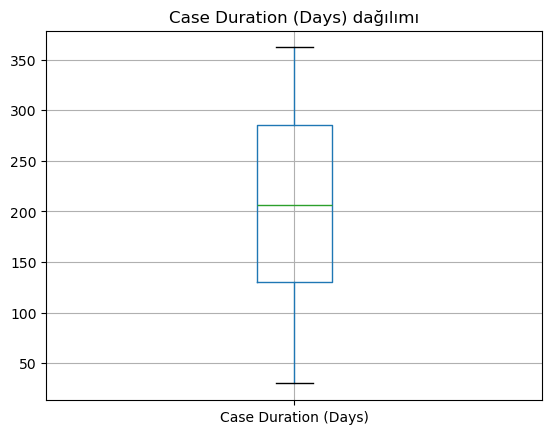

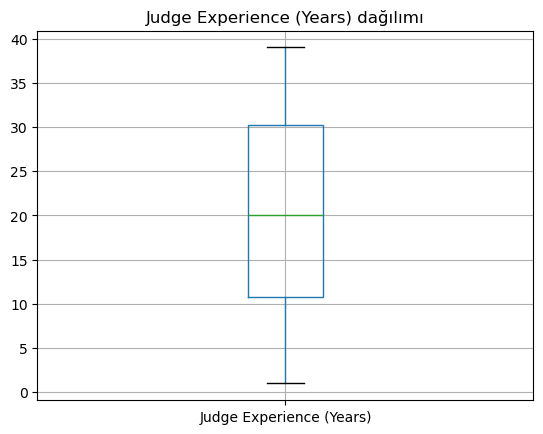

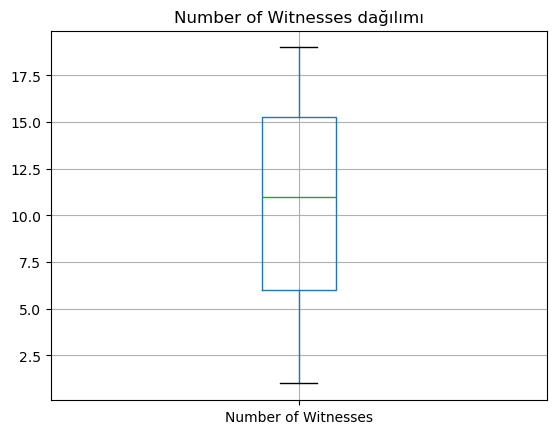

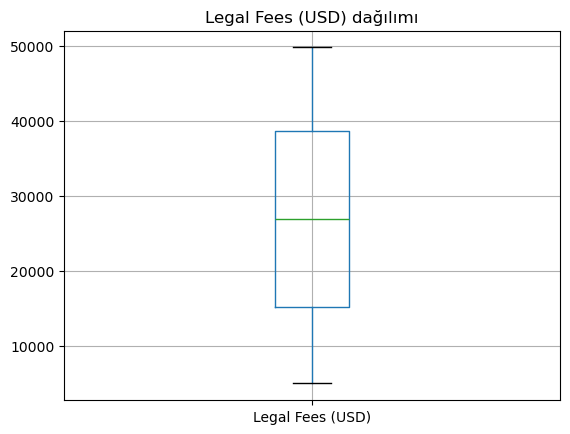

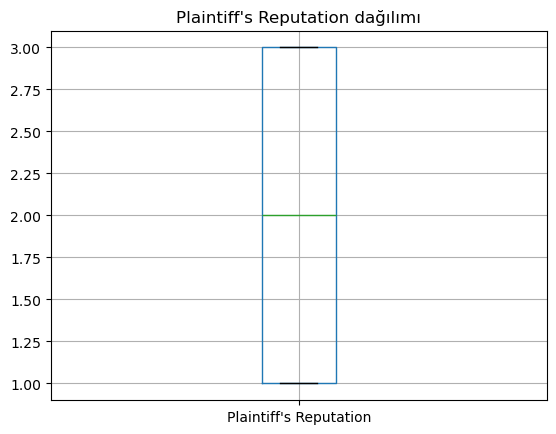

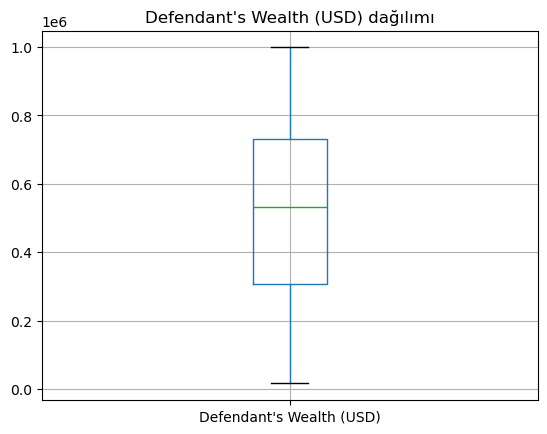

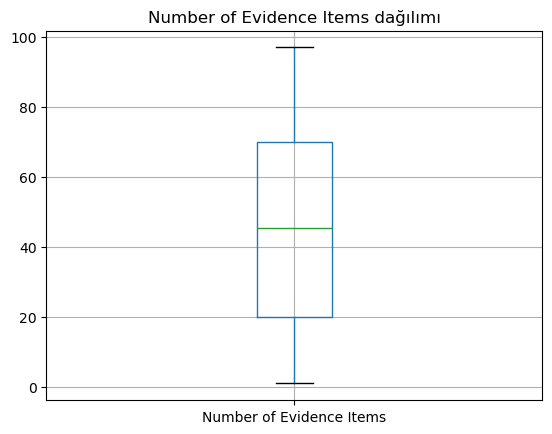

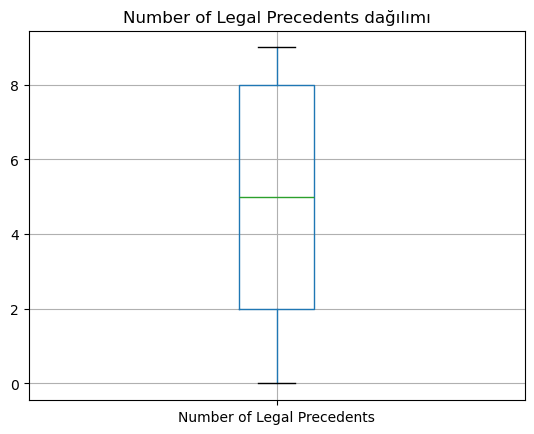

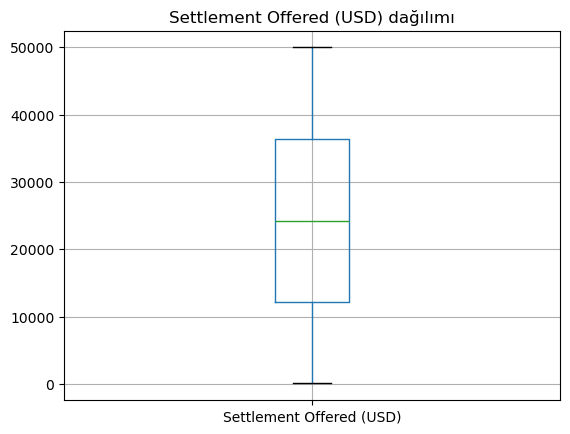

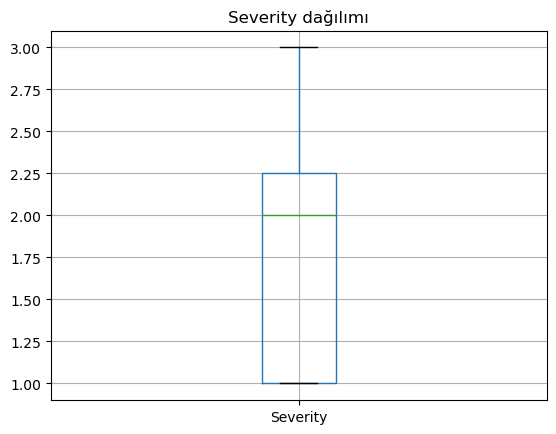

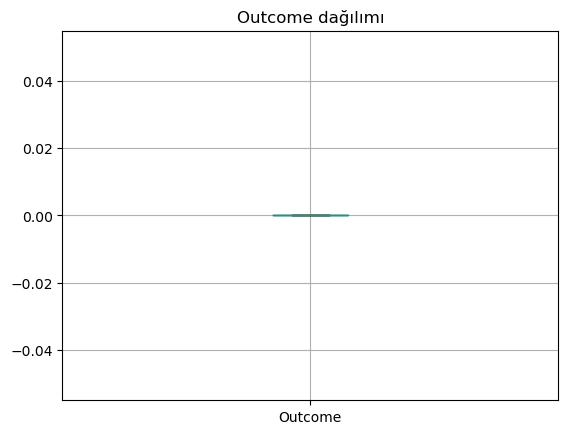

In [20]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure()
    data.boxplot([col])
    plt.title(f"{col} dağılımı")
    plt.show()

In [24]:
data_encoded = pd.get_dummies(data, drop_first=True)

# Sayısal değişkenleri standartlaştırma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded.drop("Outcome", axis=1))

##### Gözlem: 
* Boxplot’lara baktığımızda bazı değişkenlerde aşırı uç değerler gözlemleniyor. Örneğin, Legal Fees ve Settlement Offered değişkenleri bazı davalarda çok yüksek değerler içeriyor.
* Eksik değer bulunmamaktadır.
* Sayısal değişkenlerin dağılımları birbirinden farklı; bazıları daha dar bir aralıkta, bazıları çok geniş bir aralıkta dağılıyor.

##### Yorum:
* Aykırı değerler modelin öğrenmesini etkileyebilir, ancak karar ağacı algoritması outlier’lara karşı görece dayanıklıdır. Bu nedenle bu aşamada veri çıkarımı yapmaya gerek yoktur.
* Eksik veri olmadığından doldurma veya çıkarma işlemi gerekli değildir.
* Kategorik değişkenler için get_dummies ile one-hot encoding uygulanacak, sayısal değişkenler ise StandardScaler ile ölçeklendirildi.

#### Veri Setini Ayırma

In [62]:
# Özellikler (x) ve hedef değişken (y)

x = data_encoded.drop('Outcome', axis=1)
y = data_encoded['Outcome']

In [64]:
# Eğitim - Test ayırma (%80 eğitim, %20 test)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Eğitim veri boyutu:", x_train.shape)
print("Test veri boyutu:", x_test.shape)

Eğitim veri boyutu: (160, 12)
Test veri boyutu: (40, 12)


##### Gözlem: 
- Eğitim veri seti 160 kayıt ve 12 özellik içeriyor.
- Test veri seti 40 kayıt ve 12 özellik içeriyor.
- Outcome değişkeni her iki sette de dengeli şekilde dağılmış görünüyor.

##### Yorum: 
- Eğitim seti modelin öğrenmesi için yeterli büyüklükte.
- Test seti, modelin performansını objektif şekilde değerlendirmek için uygun.
- Veri bölme işlemi random_state ile sabitlendiği için tekrar eden çalıştırmalarda aynı veri bölünmesi elde ediliyor.

#### Model Kurulumu

In [68]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)

print("Karar ağacı modeli başarıyla eğitildi")

Karar ağacı modeli başarıyla eğitildi


##### Gözlem: 
- Model eğitim verileri üzerinde başarıyla eğitildi.
- Tüm 12 özellik kullanıldı ve karar ağacı algoritması her bir kayıt için Outcome tahmini yapabilecek şekilde hazır.

##### Yorum: 
- Karar ağacı algoritması, veri setindeki kategorik ve sayısal tüm değişkenleri kullanarak dallanma ve koşullar oluşturur.
- random_state parametresi ile modelin tekrarlanabilirliği sağlandı.
- Bu model, eğitim setindeki örnekler üzerinden öğrenerek test setindeki davaların Outcome değerlerini tahmin edecek.

#### Modeli Değerlendirme

In [80]:
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Model Değerlendirme Sonuçları:")
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")
print("\nDetaylı Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))


Model Değerlendirme Sonuçları:
Doğruluk (Accuracy): 1.0000
Kesinlik (Precision): 1.0000
Duyarlılık (Recall): 1.0000
F1 Skoru: 1.0000

Detaylı Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



##### Gözlem: 
- Modelin tüm metrikleri (Accuracy, Precision, Recall, F1-Score) 1.0000 olarak çıktı.
- Test setindeki 40 örneğin tamamı doğru şekilde sınıflandırıldı.
- Detaylı sınıflandırma raporunda sadece 0 sınıfı bulunduğu için tüm metrikler maksimum değerde.

##### Yorum: 
- Model test verisi üzerinde mükemmel sonuç verdi; ancak bu durum veri setindeki Outcome değişkeninin yalnızca 0 değerini içermesinden kaynaklanıyor.
- Dolayısıyla modelin gerçek dünya performansını değerlendirmek mümkün değil.
- Bu sonuç, karar ağacının eğitim verisini tamamen öğrenmiş olduğunu gösteriyor, ama sınıf çeşitliliği olmadığından modelin genellenebilirliği sınırlı.

#### Sonuçları Görselleştirme

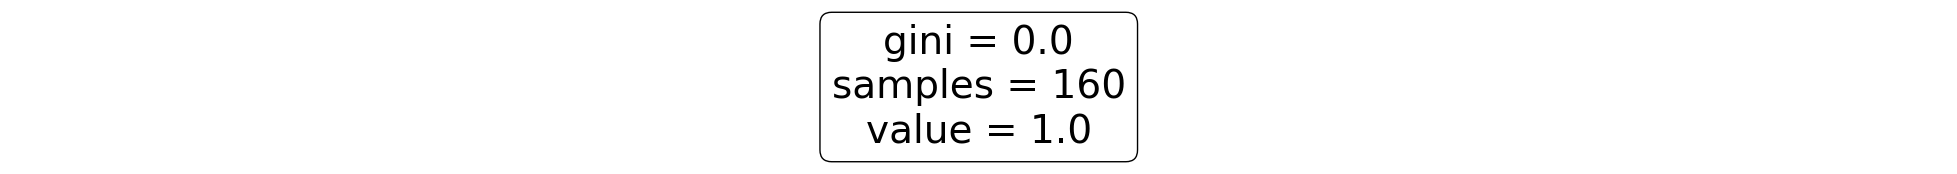

In [104]:
plt.figure(figsize=(25,2))
plot_tree(
    dt_model, 
    feature_names= x.columns, 
    class_names=['Kaybet', 'Kazan'], 
    filled=True, 
    rounded=True
)
plt.show()

##### Gözlem: 
- Karar ağacındaki her yaprak saf (gini = 0.0) ve yalnızca tek bir sınıf içeriyor. 
- Tüm 160 eğitim örneği tek sınıfa ait olduğu için ayrım yapılacak başka bir sınıf yok.
- Dallarda hiçbir karışıklık veya belirsizlik yok; model tamamen tek sınıfa uyan kurallar oluşturmuş.

##### Yorum: 
- Gini katsayısı 0.0 olması, yaprağın tamamen homojen olduğunu ve yalnızca tek bir sınıf içerdiğini gösteriyor.
- Bu durumda, hangi özelliğin daha etkili olduğu veya karar ağacının hangi dallarında ayrım yapıldığı hakkında yorum yapmak mümkün değil.
- Gerçek dünyada modelin anlamlı bir şekilde özellik etkilerini değerlendirebilmesi için Outcome değişkeninde hem 0 hem de 1 değerleri bulunmalıdır.

## Genel Analiz
Yapılan veri ön işleme, modelleme ve görselleştirmeler, dava sonuçlarını etkileyebilecek çeşitli faktörlerin değerlendirilmesini sağladı.

- Outcome değişkeni yalnızca 0 değerini içerdiği için model tüm örnekleri aynı sınıfa atadı. Bu nedenle modelin performansı test setinde mükemmel (Accuracy = 1.0) görünse de, gerçek dünyadaki genellenebilirliği sınırlı.
- Karar ağacı görselleştirmesi, tüm yaprakların homojen olduğunu (gini = 0.0) ve tek sınıfa ait örnekler içerdiğini gösterdi. Bu nedenle hangi özelliklerin davanın sonucunu belirlemede daha etkili olduğu gözlemlenemedi.
- Veri ön işleme sürecinde eksik veri bulunmadı, sayısal değişkenler farklı aralıklarda dağılıyordu ve kategorik değişkenler one-hot encoding ile dönüştürüldü. Bu, modelin öğrenme süreci için uygun veri yapısı oluşturdu.
- Aykırı değerler özellikle Legal Fees ve Settlement Offered değişkenlerinde görüldü; karar ağacı algoritması bu tür outlier’lara karşı görece dayanıklı olduğundan, veri çıkarımı yapılmadı.

### Sonuç olarak:
Bu analiz, veri setindeki sınıf dengesizliğinin model performansını ve yorumlanabilirliğini doğrudan etkilediğini gösteriyor. Outcome değişkeninde farklı sınıflar olsaydı, karar ağacı görselleştirmesi ile hangi faktörlerin dava sonucunu daha çok etkilediği net bir şekilde yorumlanabilirdi.